# UNIDAD 3

## Objetos espaciales en R

In [1]:
# Load packages
library(sf)
library(raster)
library(spData)

Linking to GEOS 3.6.1, GDAL 2.2.3, PROJ 4.9.3

Loading required package: sp

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`



### Ejercicio 1 

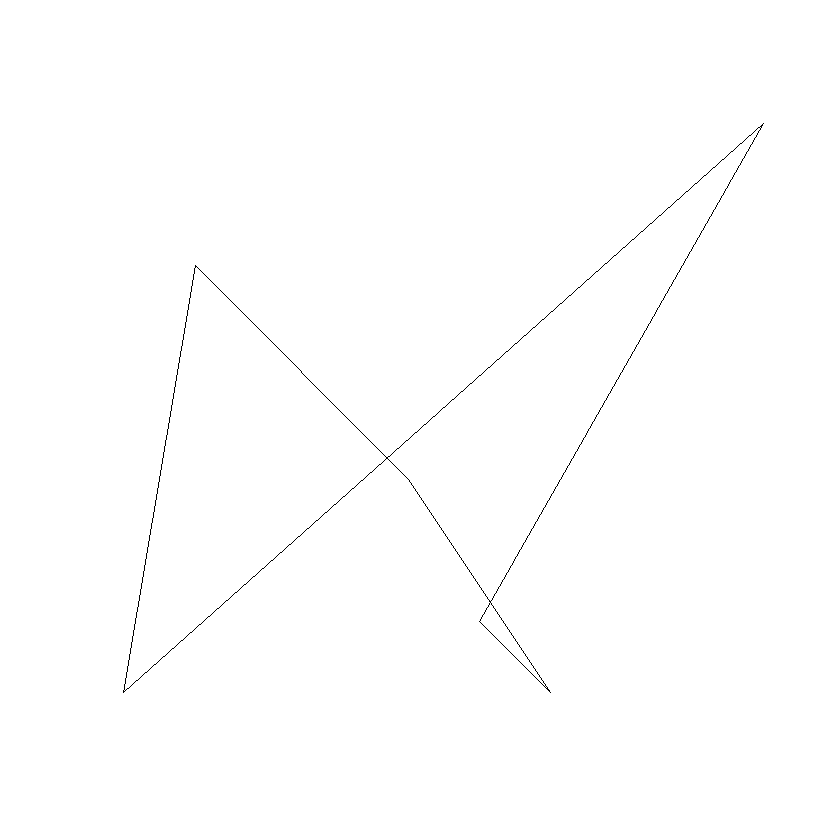

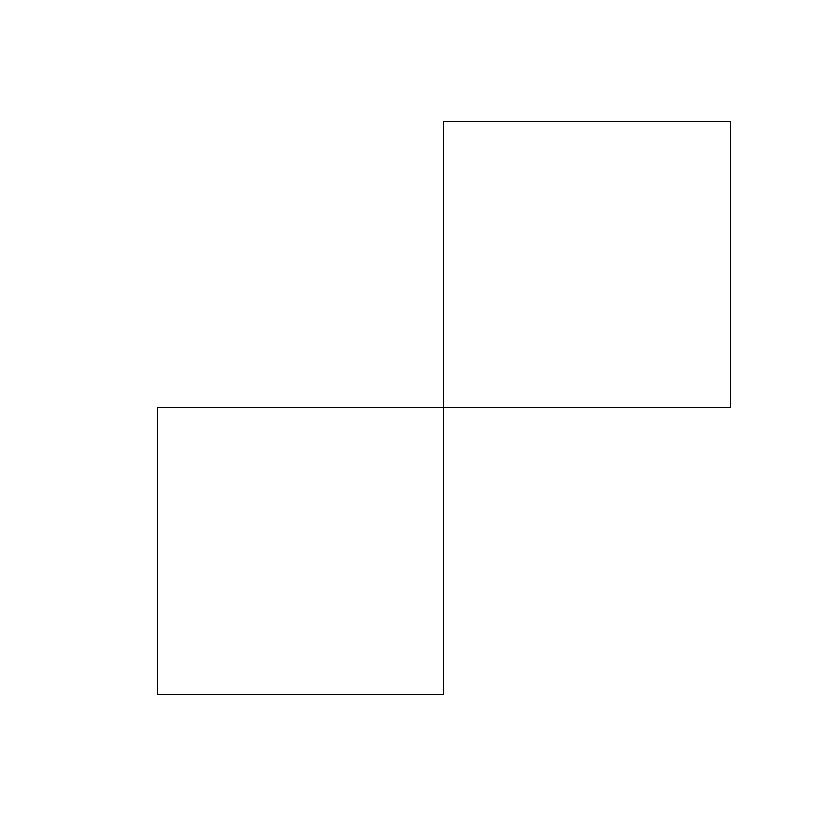

In [2]:
# Points
# --------------------
p1 <- st_point(c(3, 7))
p2 <- st_point(c(-4, 9))
p3 <- st_point(c(0, 27, 8))

# Linestrings
# --------------------
# Line 1
x_line1 <- c(12, 6, 0)
y_line1 <- c(4, 1, 1)
xy_line1 <- cbind(x_line1, y_line1)
l1 <- st_linestring(xy_line1)
# Line 2
x_line2 <- c(-4, 7, 2)
y_line2 <- c(9, 8, 10)
xy_line2 <- cbind(x_line2, y_line2)
l2 <- st_linestring(xy_line2)
# Line 3
x_line3 <- c(0, 4, -3)
y_line3 <- c(2, 7, 9)
xy_line3 <- cbind(x_line3, y_line3)
l3 <- st_linestring(xy_line3)

# Polygons
# --------------------
# Polygon 1
x_pl1 <- c(1, 4, 6, 5, 9, 0, 1)
y_pl1 <- c(7, 4, 1, 2, 9, 1, 7)
xy_pl1 <- list(cbind(x_pl1, y_pl1))
pl1 <- st_polygon(xy_pl1)
# Polygon2
x_pl2 <- c(0, 0, 2, 2, 1, 1, 0)
y_pl2 <- c(0, 1, 1, 2, 2, 0, 0)
xy_pl2 <- list(cbind(x_pl2, y_pl2))
pl2 <- st_polygon(xy_pl2)

plot(pl1)
plot(pl2)

### Ejercicio 2

Warning message in rbind(p1, p2, p3):
"number of columns of result is not a multiple of vector length (arg 1)"


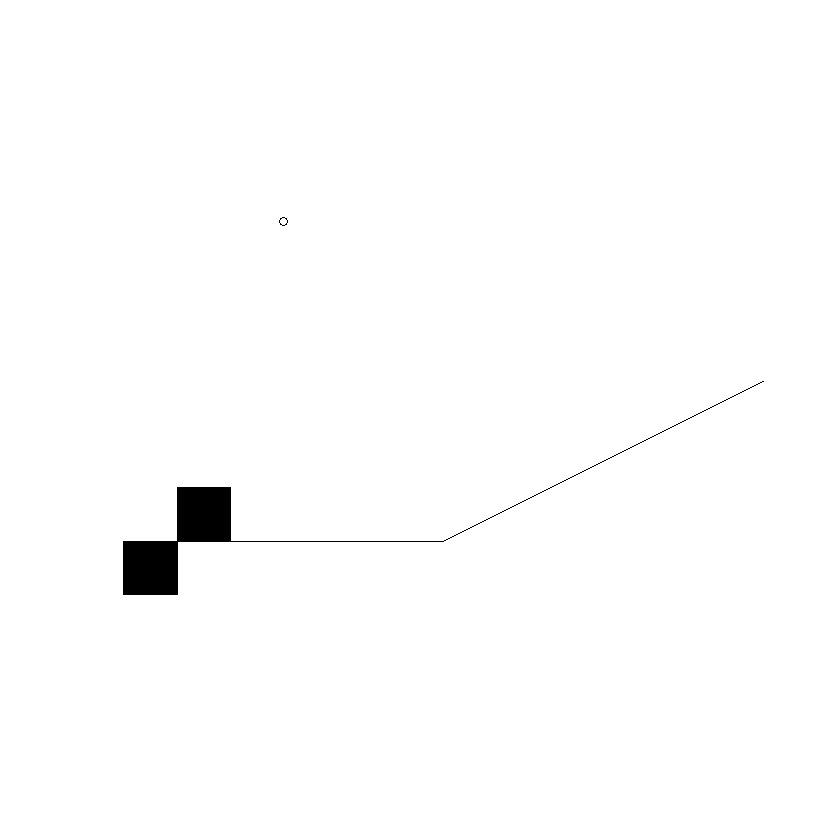

In [3]:
# Multipoint
xy_mp1 <- rbind(p1, p2, p3)
mp1 <- st_multipoint(xy_mp1)

# Multilinestring
ml1 <- st_multilinestring(list(l1, l2, l3))

# Multipolygon
mp1 <- st_multipolygon(list(pl1, pl2))

# Geometry collection
gc1 <- st_geometrycollection(list(p1, l1, pl2))
plot(gc1)

### Ejercicio 3

In [2]:
# Creación de 3 puntos
p4 <- st_point(c(-1.6967, 37.6775))
p5 <- st_point(c(-1.6967, 37.6774))
p6 <- st_point(c(-1.700, 37.6761))
cp1 <- st_sfc(p4, p5, p6)
# Dar CRS
st_crs(cp1) <- 4326

In [9]:
st_crs(cp1)

Coordinate Reference System:
  EPSG: 4326 
  proj4string: "+proj=longlat +datum=WGS84 +no_defs"

POINT (-1.6967 37.6775)

POINT (-1.6967 37.6774)

POINT (-1.7 37.6761)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, err

Geometry set for 3 features 
geometry type:  POINT
dimension:      XY
bbox:           xmin: -1.7 ymin: 37.6761 xmax: -1.6967 ymax: 37.6775
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs

### Ejercicio 4 

In [8]:
# Creación de atributos
atrib = data.frame(name = c('Museo muBBla', 'Capilla del Rosario', 'Casa de los Albuquerque'))

# Objeto SF
sf = st_sf(atrib, geometry = cp1)

# Preguntas
class(sf)
names(sf)

# Renombrar columnas
colnames(sf) <- c('Nombres', 'Geom')
names(sf)
summary(sf)

[1] "sf"         "data.frame"

[1] "name"     "geometry"

[1] "Nombres" "Geom"

                    Nombres             Geom  
 Capilla del Rosario    :1   POINT        :3  
 Casa de los Albuquerque:1   epsg:4326    :0  
 Museo muBBla           :1   +proj=long...:0  

### Ejercicio 5

In [16]:
# Rutas
ruta_shp = 'datos/datos_vectoriales/NC_Hydro.shp'
ruta_geojson = 'datos/datos_vectoriales/PuntoLimpioMovil.geojson'

# Importación de datos
hydro <- st_read(ruta_shp)
pto_movil <- st_read(ruta_geojson)

# Respuestas
names(hydro)
names(pto_movil)

Reading layer `NC_Hydro' from data source `C:\Users\fmart\Documents\Workspace\SIG_y_R\datos\datos_vectoriales\NC_Hydro.shp' using driver `ESRI Shapefile'
Simple feature collection with 3405 features and 5 fields
geometry type:  LINESTRING
dimension:      XY
bbox:           xmin: -84.29812 ymin: 33.83982 xmax: -75.45998 ymax: 36.58755
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `PuntoLimpioMovil' from data source `C:\Users\fmart\Documents\Workspace\SIG_y_R\datos\datos_vectoriales\PuntoLimpioMovil.geojson' using driver `GeoJSON'
Simple feature collection with 32 features and 10 fields
geometry type:  POINT
dimension:      XY
bbox:           xmin: -6.534223 ymin: 39.19655 xmax: -6.348502 ymax: 39.49653
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


[1] "FID"      "MILES"    "LABEL"    "FIPS"     "StrmName" "geometry"

[1] "uri"                           "rdfs_label"                   
 [3] "schema_description"            "rdfs_comment"                 
 [5] "om_tieneEnlaceSIG"             "om_situadoEnVia"              
 [7] "geo_lat"                       "geo_long"                     
 [9] "schema_address_streetAddress"  "schema_address_addressCountry"
[11] "geometry"

In [17]:
head(hydro, 3)
head(pto_movil, 3)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

FID,MILES,LABEL,FIPS,StrmName,geometry
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<LINESTRING [°]>
3001,12.577,1,141,NA,LINESTRING (-77.93454 34.35...
3002,11.965,1,141,NA,LINESTRING (-77.65737 34.35...
3003,2.460,1,47,Lumber River,LINESTRING (-79.00763 34.37...


ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called 'geojsonio'

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

uri,rdfs_label,schema_description,rdfs_comment,om_tieneEnlaceSIG,om_situadoEnVia,geo_lat,geo_long,schema_address_streetAddress,schema_address_addressCountry,geometry
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<POINT [°]>
http://opendata.caceres.es/recurso/medio-ambiente/puntos-limpios/PuntoLimpioMovil/22,Punto limpio móvil 22,En El Cruce Con La Cuesta Junto Al Parque,Viernes de 16:00 a 18:00 de la 3ª semana de mes.,http://sig.caceres.es/serweb/fichasig/fichapuntos.php?mslink=23,http://opendata.caceres.es/recurso/urbanismo-infraestructuras/vias/Via/calle-3914,39.4741284845,-6.3529767008,Calle Federico Mayor Zaragoza,ES,POINT (-6.352977 39.47413)
http://opendata.caceres.es/recurso/medio-ambiente/puntos-limpios/PuntoLimpioMovil/9,Punto limpio móvil 9,Frente A La Asociacion De Vecinos 'los Arcos',Lunes de 18:00 a 20:00 de la 2ª semana de mes.,http://sig.caceres.es/serweb/fichasig/fichapuntos.php?mslink=10,http://opendata.caceres.es/recurso/urbanismo-infraestructuras/vias/Via/calle-3396,39.4764798569,-6.39140409641,"Calle Osa Mayor, 43",ES,POINT (-6.391404 39.47648)
http://opendata.caceres.es/recurso/medio-ambiente/puntos-limpios/PuntoLimpioMovil/15,Punto limpio móvil 15,En La Esquina Con Calle 'garcia De Paredes',Viernes de 18:00 a 20:00 de la 2ª semana de mes.,http://sig.caceres.es/serweb/fichasig/fichapuntos.php?mslink=16,http://opendata.caceres.es/recurso/urbanismo-infraestructuras/vias/Via/calle-2850,39.3776064195,-6.34850225271,"Calle Cristobal Colon, 21",ES,POINT (-6.348502 39.37761)


### Ejercicio 6

In [43]:
# Exportación de datos

setwd('C:/Users/fmart/Documents/Workspace/SIG_y_R/nuevos_datos')

# Capa NC_Hydro
st_write(hydro, 'NC_Hydro.csv', delete_layer=TRUE)
st_write(hydro, 'NC_Hydro.gml', delete_layer=TRUE)
st_write(hydro, 'NC_Hydro.geojson', delete_layer=TRUE)

# Capa PuntoLimpioMovil
st_write(pto_movil, 'PuntoLimpioMovil.jml', delete_layer=TRUE)
st_write(pto_movil, 'PuntoLimpioMovil.shp', delete_layer=TRUE)
st_write(pto_movil, 'PuntoLimpioMovil.kml', delete_layer=TRUE)

Writing layer `NC_Hydro' to data source `NC_Hydro.csv' using driver `CSV'
Writing 3405 features with 5 fields and geometry type Line String.
Writing layer `NC_Hydro' to data source `NC_Hydro.gml' using driver `GML'
Writing 3405 features with 5 fields and geometry type Line String.
Writing layer `NC_Hydro' to data source `NC_Hydro.geojson' using driver `GeoJSON'
Writing 3405 features with 5 fields and geometry type Line String.
Writing layer `PuntoLimpioMovil' to data source `PuntoLimpioMovil.jml' using driver `JML'
Writing 32 features with 10 fields and geometry type Point.


Warning message in abbreviate_shapefile_names(obj):
"Field names abbreviated for ESRI Shapefile driver"


Writing layer `PuntoLimpioMovil' to data source `PuntoLimpioMovil.shp' using driver `ESRI Shapefile'
Writing 32 features with 10 fields and geometry type Point.
Writing layer `PuntoLimpioMovil' to data source `PuntoLimpioMovil.kml' using driver `KML'
Writing 32 features with 10 fields and geometry type Point.


#### Ejercicio 7

class      : RasterLayer 
dimensions : 694, 757, 525358  (nrow, ncol, ncell)
resolution : 30, 30  (x, y)
extent     : 672793, 695503, 5749586, 5770406  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=31 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0 
source     : C:/Users/fmart/Documents/Workspace/SIG_y_R/datos/datos_raster/LC81970242014109LGN00_sr_band2.tif 
names      : LC81970242014109LGN00_sr_band2 
values     : -32768, 32767  (min, max)


Warning message in .local(object, ...):
"summary is an estimate based on a sample of 1e+05 cells (19.03% of all cells)
"


,LC81970242014109LGN00_sr_band2
Min.,15
1st Qu.,216
Median,323
3rd Qu.,471
Max.,5513
NA's,0


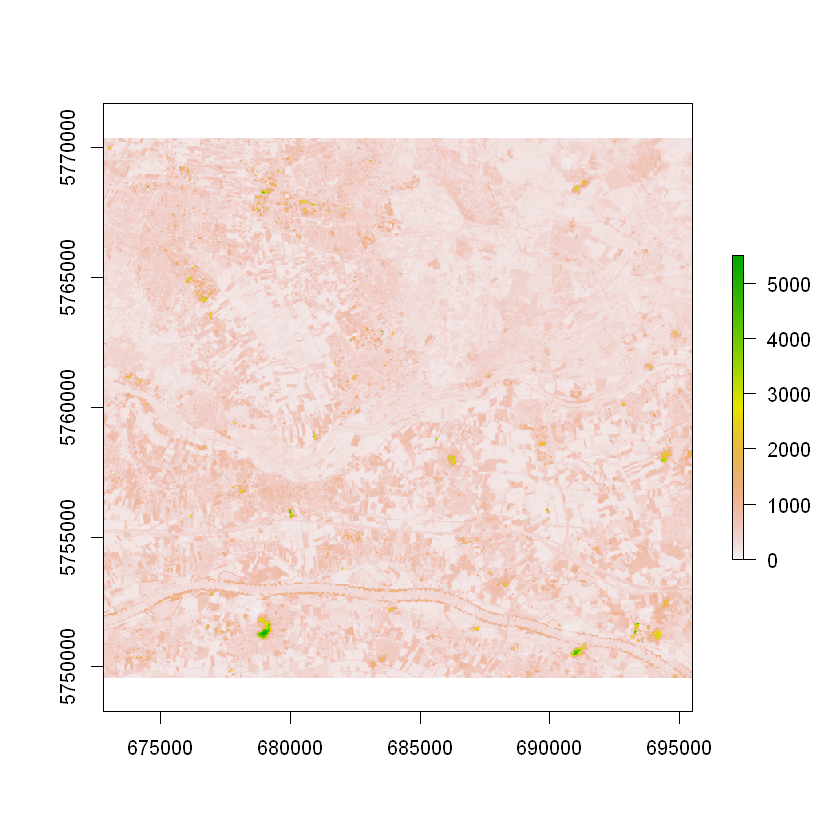

In [4]:
# Volver a establecer directorio de trabajo
setwd('C:/Users/fmart/Documents/Workspace/SIG_y_R')

# Importación del ráster
r1 = raster('datos/datos_raster/LC81970242014109LGN00_sr_band2.tif')

# Respuestas
r1
summary(r1)
plot(r1)


### Ejercicio 8

In [5]:
writeFormats()

name,long_name
raster,R-raster
SAGA,SAGA GIS
IDRISI,IDRISI
IDRISIold,IDRISI (img/doc)
BIL,Band by Line
BSQ,Band Sequential
BIP,Band by Pixel
ascii,Arc ASCII
CDF,NetCDF
big,big.matrix


### Ejercicio 9

In [11]:
# Carga del objeto 'grain', incluido por defecto en la librería spData
grain
summary(grain)

class      : RasterLayer 
dimensions : 6, 6, 36  (nrow, ncol, ncell)
resolution : 0.5, 0.5  (x, y)
extent     : -1.5, 1.5, -1.5, 1.5  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0 
source     : memory
names      : layer 
values     : 1, 3  (min, max)
attributes :
 ID VALUE
  1  clay
  2  silt
  3  sand


,layer
Min.,1
1st Qu.,1
Median,2
3rd Qu.,3
Max.,3
NA's,0


In [14]:
# Exportar el objeto a un nuevo formato ráster
# De nuevo, modificamos el wd para exportar los datos junto 
# los ya creados en apartados anteriores
setwd('C:/Users/fmart/Documents/Workspace/SIG_y_R/nuevos_datos')

# Exportar ráster
writeRaster(grain, filename='grain.saga', format = 'SAGA', overwrite = TRUE)

class      : RasterLayer 
dimensions : 6, 6, 36  (nrow, ncol, ncell)
resolution : 0.5, 0.5  (x, y)
extent     : -1.5, 1.5, -1.5, 1.5  (xmin, xmax, ymin, ymax)
crs        : NA 
source     : C:/Users/fmart/Documents/Workspace/SIG_y_R/nuevos_datos/grain.sgrd 
names      : layer 
values     : 1, 3  (min, max)


,layer
Min.,1
1st Qu.,1
Median,2
3rd Qu.,3
Max.,3
NA's,0


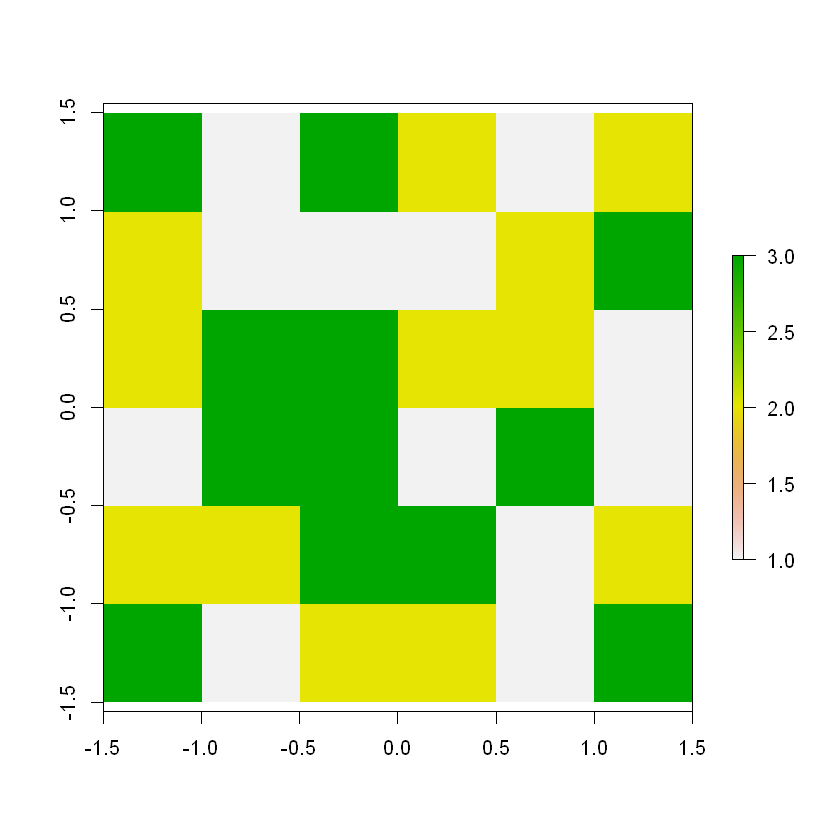

In [16]:
# Volver a cargar el raster
grain_raster = raster('grain.sgrd')
summary(grain_raster)
plot(grain_raster)